In [ ]:
#PREDICTION OF ABNORMAL VS. NORMAL FEATURES FOR PATIENTS WITH SPECIFIC PELVIC AND SPINAL CHARACTERISTICS 
#Content
#Field Descriptions:
#Each patient is represented in the data set by six biomechanical attributes derived from the shape and orientation of the pelvis and lumbar spine (each one is a column):

#pelvic incidence
#pelvic tilt
#lumbar lordosis angle
#sacral slope
#pelvic radius
#grade of spondylolisthesis

#Acknowledgements
#The original dataset was downloaded from UCI ML repository:
#Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science

#Files were converted to CSV

#Inspiration
#Use these biomechanical features to classify patients according to their labels

In [ ]:
#Context

#The data have been organized in two different but related classification tasks.

#column_3C_weka.csv (file with three class labels)
#The first task consists in classifying patients as belonging to one out of three categories: Normal (100 patients), 
#Disk Hernia (60 patients) or Spondylolisthesis (150 patients).
    
#column_2C_weka.csv (file with two class labels)
#For the second task, the categories Disk Hernia and Spondylolisthesis were merged into a single category l
#abelled as 'abnormal'. Thus, the second task consists in classifying patients as belonging to one out of two 
#categories: Normal (100 patients) or Abnormal (210 patients).

In [15]:
#Exploratory data analysis for Normal vs. Abnormal Patients
#Start examiniing and cleaning data; import necessary packages
import pandas as pd
import numpy as np
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
import os

In [24]:
#Import csv file into python and look at first five rows of data, two classification data (Normal vs. Abnormal)
path=('/Users/lindalambert/Desktop/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv')
pelvic_df = pd.read_csv(path)
pelvic_df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [25]:
pelvic_df.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [26]:
#List missing data for first five rows
missing_data = df.isnull()
missing_data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [27]:
# List data with missing values
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

pelvic_incidence
False    310
Name: pelvic_incidence, dtype: int64

pelvic_tilt numeric
False    310
Name: pelvic_tilt numeric, dtype: int64

lumbar_lordosis_angle
False    310
Name: lumbar_lordosis_angle, dtype: int64

sacral_slope
False    310
Name: sacral_slope, dtype: int64

pelvic_radius
False    310
Name: pelvic_radius, dtype: int64

degree_spondylolisthesis
False    310
Name: degree_spondylolisthesis, dtype: int64

class
False    310
Name: class, dtype: int64



In [28]:
#Replace Abnormal with 1 (integer) to work with skitlearn
pelvic_df["class"].replace("Abnormal", 1, inplace=True)

In [29]:
#Replace Abnormal with 0 (integer) to work with skitlearn
pelvic_df["class"].replace("Normal", 0, inplace=True)

In [22]:
pelvic_df.head(5)



,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [30]:
# COMPUTATIONS FOR LOGISTIC REGRESSION
pelvic_df.describe()
data =pelvic_df
shape=data.shape
print(shape)
list(pelvic_df.columns.values)

(310, 7)


['pelvic_incidence',
 'pelvic_tilt numeric',
 'lumbar_lordosis_angle',
 'sacral_slope',
 'pelvic_radius',
 'degree_spondylolisthesis',
 'class']

In [31]:
X = np.asarray(pelvic_df[['pelvic_incidence','pelvic_tilt numeric','lumbar_lordosis_angle','sacral_slope','pelvic_radius',
 'degree_spondylolisthesis']])
X[0:5]

array([[ 63.0278175 ,  22.55258597,  39.60911701,  40.47523153,
         98.67291675,  -0.25439999],
       [ 39.05695098,  10.06099147,  25.01537822,  28.99595951,
        114.4054254 ,   4.56425864],
       [ 68.83202098,  22.21848205,  50.09219357,  46.61353893,
        105.9851355 ,  -3.53031731],
       [ 69.29700807,  24.65287791,  44.31123813,  44.64413017,
        101.8684951 ,  11.21152344],
       [ 49.71285934,   9.65207488,  28.317406  ,  40.06078446,
        108.1687249 ,   7.91850062]])

In [32]:
y = np.asarray(pelvic_df['class'])
y [0:5]

array([1, 1, 1, 1, 1])

In [33]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.14708636,  0.50136873, -0.6651769 , -0.18495031, -1.4476468 ,
        -0.70805942],
       [-1.24586434, -0.74876898, -1.45300075, -1.0415207 , -0.26438488,
        -0.57955637],
       [ 0.4843695 ,  0.46793218, -0.09926175,  0.2730833 , -0.89768556,
        -0.79542095],
       [ 0.51138997,  0.71156241, -0.41133905,  0.12612823, -1.2073033 ,
        -0.40228841],
       [-0.62664788, -0.78969266, -1.27474511, -0.21587588, -0.73345503,
        -0.4901061 ]])

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (248, 6) (248,)
Test set: (62, 6) (62,)


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
yhat = LR.predict(X_test)
yhat

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0])

In [37]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.34911912, 0.65088088],
       [0.57331022, 0.42668978],
       [0.22724289, 0.77275711],
       [0.57872425, 0.42127575],
       [0.58513015, 0.41486985],
       [0.4348581 , 0.5651419 ],
       [0.31738684, 0.68261316],
       [0.46302343, 0.53697657],
       [0.38597103, 0.61402897],
       [0.54678941, 0.45321059],
       [0.45452746, 0.54547254],
       [0.54120028, 0.45879972],
       [0.35524544, 0.64475456],
       [0.35265312, 0.64734688],
       [0.33475611, 0.66524389],
       [0.53994007, 0.46005993],
       [0.3097624 , 0.6902376 ],
       [0.45532873, 0.54467127],
       [0.21095751, 0.78904249],
       [0.47075911, 0.52924089],
       [0.51864646, 0.48135354],
       [0.23195375, 0.76804625],
       [0.58287232, 0.41712768],
       [0.44038553, 0.55961447],
       [0.54820049, 0.45179951],
       [0.32994609, 0.67005391],
       [0.65776076, 0.34223924],
       [0.49058383, 0.50941617],
       [0.37810969, 0.62189031],
       [0.54288462, 0.45711538],
       [0.

In [38]:
#Jaccard Index
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.8387096774193549

In [39]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[33  8]
 [ 2 19]]


Confusion matrix, without normalization
[[33  8]
 [ 2 19]]


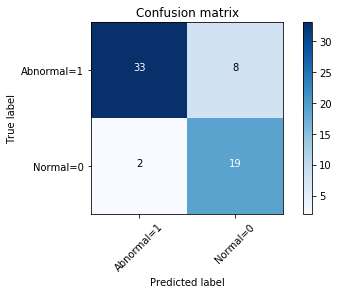

In [40]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Abnormal=1','Normal=0'],normalize= False,  title='Confusion matrix')

In [41]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.70      0.90      0.79        21
           1       0.94      0.80      0.87        41

   micro avg       0.84      0.84      0.84        62
   macro avg       0.82      0.85      0.83        62
weighted avg       0.86      0.84      0.84        62



In [42]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.554571989464591